In [236]:
# Enter Calculated Velocity and Substrate values below in S & V
# Enter the multiple of S & V in S_multiple adn V_multiple
import matplotlib.pyplot as plt
import numpy as np

# matplotlib settings
%matplotlib inline
plt.rcParams.update({'font.size': 22})


# Data Entry
S = [ 1, 1.25, 1.65, 2, 2.5, 3.33, 4, 5, 6, 8]
V = [ 16, 19, 23.6, 30.8, 30.3, 40, 44.4, 48, 53.4, 57.1]

# power for 10
S_multiple = -5   
V_multiple = 0
S_inv_multiple = -1*S_multiple
V_inv_multiple = -1*V_multiple
S_by_V_multiple = S_multiple + V_inv_multiple
V_by_S_multiple = V_multiple + S_inv_multiple

# derived values
S_inv = [1/i for i in S]
V_inv = [1/i for i in V]
S_by_V = [i/j for i,j in zip(S, V)]
V_by_S = [i/j for i,j in zip(V, S)]

# vertical line parameters
line = [[0,0],[0,1000]]
x_line = [x for [x, y] in line]
y_line = [y for [x, y] in line]

# super script function AxB^C
def superscript(A, B, C):
    if(C!=0):
        sup = A+"x"
        sup += str(B)
        C = str(C)
        for i in range(len(C)):
            sup += r'$^%s$' %C[i]
        return sup
    else: 
        return A

# calculate slope and intercept
# A -> abcissa list
# B -> ordinate list
def slope_intercept(A, B):
    return np.polyfit(A, B, 1)

Michaelis–Menten Plot: 
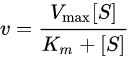

Text(0,0.5,'V')

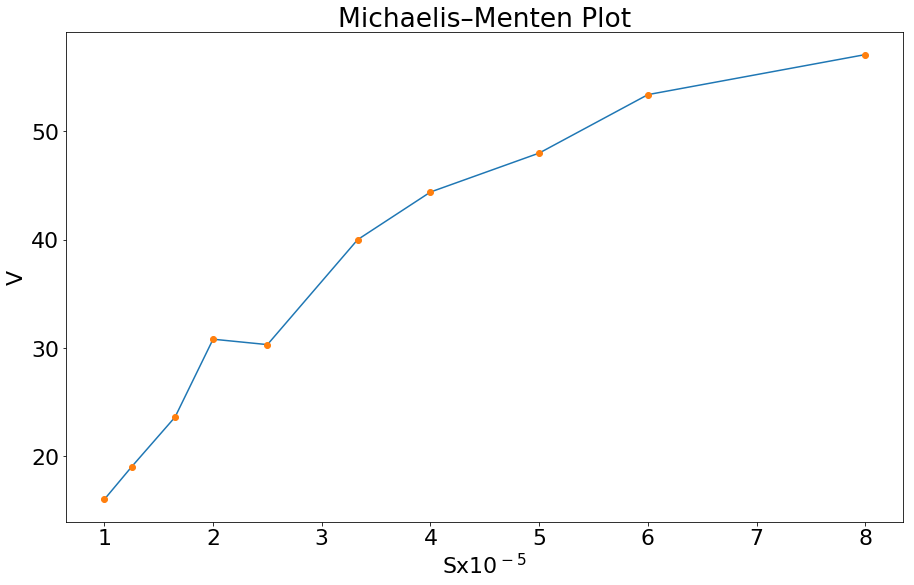

In [239]:
# michaelis menten graph
plt.figure(figsize = (15, 9))
plt.plot(S, V)
plt.plot(S, V, 'o')
plt.title("Michaelis–Menten Plot")
plt.xlabel(superscript("S", 10, S_multiple))
plt.ylabel(superscript("V", 10, V_multiple))


Lineweaver–Burk plot :
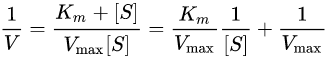

Slope :  0.052312753252844235
Y Intercept :  0.010011358200380526
X Intercept :  -0.19137509647011766
Vmax :  99.88654685854618
Km :  5.22534027908979


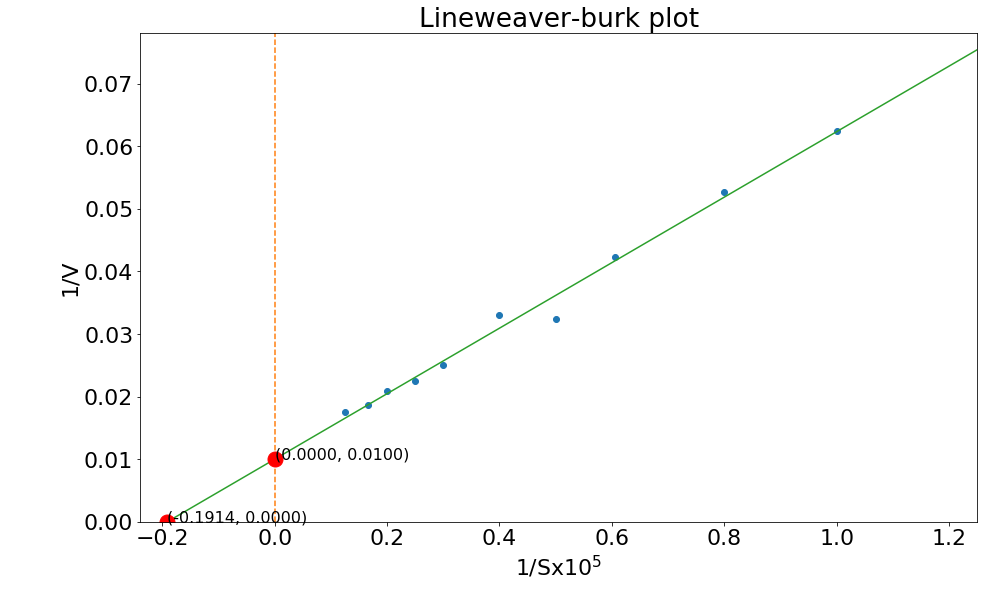

In [245]:
# Lineweaver–Burk plot
burk_slope , burk_y_intercept = slope_intercept(S_inv, V_inv)
burk_vmax = 1/burk_y_intercept
burk_km = burk_vmax*burk_slope
burk_x_intercept = -(1/burk_km)
# abvalues = [burk_slope*i + burk_y_intercept for i in S_inv]
# trend line parameters
burk_trend_line = [[burk_x_intercept,0],[0,burk_y_intercept], [2*max(S_inv), burk_slope*(2*max(S_inv))+burk_y_intercept]]    
burk_trend_x = [x for [x, y] in burk_trend_line]
burk_trend_y = [y for [x, y] in burk_trend_line]


plt.figure(figsize = (15, 9))
plt.axis([1.25*burk_x_intercept,1.25*max(S_inv),0 , 1.25*max(V_inv)])
plt.title("Lineweaver-burk plot")
plt.plot(S_inv, V_inv, 'o')
# plt.plot(S_inv, abvalues, 'o')
plt.plot(x_line, y_line, '--')
plt.plot(burk_trend_x, burk_trend_y)
plt.plot(burk_trend_x, burk_trend_y, 'o', color = 'r', markersize = 15)
for xy in zip(burk_trend_x, burk_trend_y):                  
    plt.annotate('(%.4f, %.4f)' % xy, xy=xy, textcoords='data', size = 16)
plt.xlabel(superscript("1/S", 10, S_inv_multiple))
plt.ylabel(superscript("1/V", 10, V_inv_multiple))
print("Slope : ", burk_slope)
print("Y Intercept : ", burk_y_intercept)
print("X Intercept : ", burk_x_intercept)
print("Vmax : ",burk_vmax)
print("Km : ", burk_km)

Eadie–Hofstee plot :
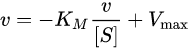

Slope :  -4.5339617736017255
Y Intercept :  91.47120519307002
X Intercept :  20.17467498858209
Vmax :  91.47120519307002
Km :  4.5339617736017255


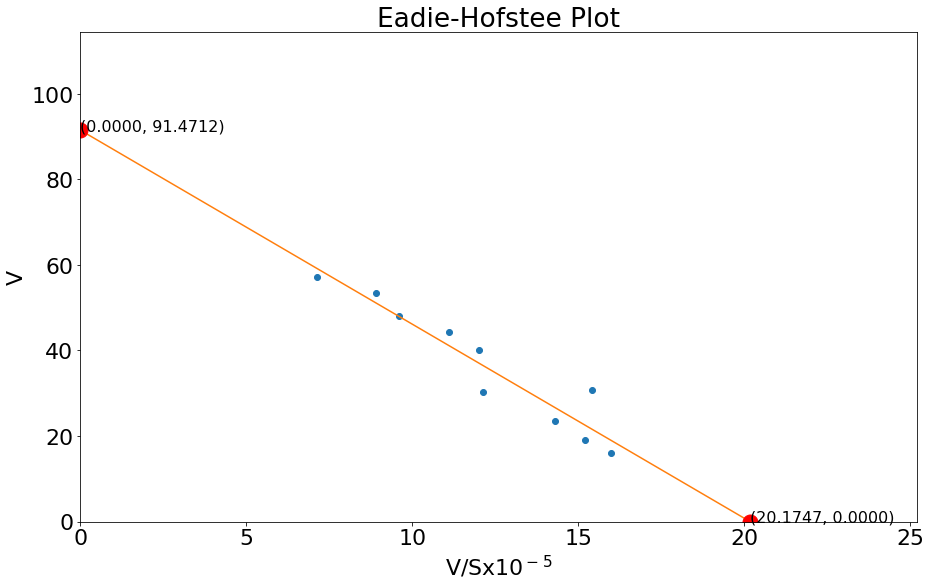

In [224]:
# Eadie–Hofstee plot 
eadie_slope, eadie_y_intercept = slope_intercept(V_by_S, V)
eadie_vmax = eadie_y_intercept
eadie_x_intercept = eadie_vmax/(-1*eadie_slope)
eadie_km = (-1*eadie_slope)
# trean line parameters
eadie_trend_line = [[eadie_x_intercept, 0], [0, eadie_y_intercept]]
eadie_trend_x = [x for [x, y] in eadie_trend_line]
eadie_trend_y = [y for [x, y] in eadie_trend_line]


plt.figure(figsize = (15, 9))
plt.axis([0,1.25*eadie_x_intercept,0 , 1.25*eadie_y_intercept])
plt.title("Eadie-Hofstee Plot")
plt.plot(V_by_S, V, 'o')
plt.plot(eadie_trend_x, eadie_trend_y)
plt.plot(eadie_trend_x, eadie_trend_y, 'o', color='r', markersize = 15)
for xy in zip(eadie_trend_x, eadie_trend_y):
    plt.annotate('(%.4f, %.4f)' % xy, xy=xy, textcoords='data', size = 16)
plt.xlabel(superscript("V/S", 10, S_by_V_multiple))
plt.ylabel(superscript("V", 10, V_multiple))
print("Slope : ", eadie_slope)
print("Y Intercept : ", eadie_y_intercept)
print("X Intercept : ", eadie_x_intercept)
print("Vmax : ",eadie_vmax)
print("Km : ", eadie_km)

Hanes–Woolf plot : 
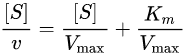

Slope :  0.010820299875682055
Y Intercept :  0.049983041512686954
X Intercept :  -4.619376735114403
Vmax :  99.88654685854618
Km :  5.22534027908979


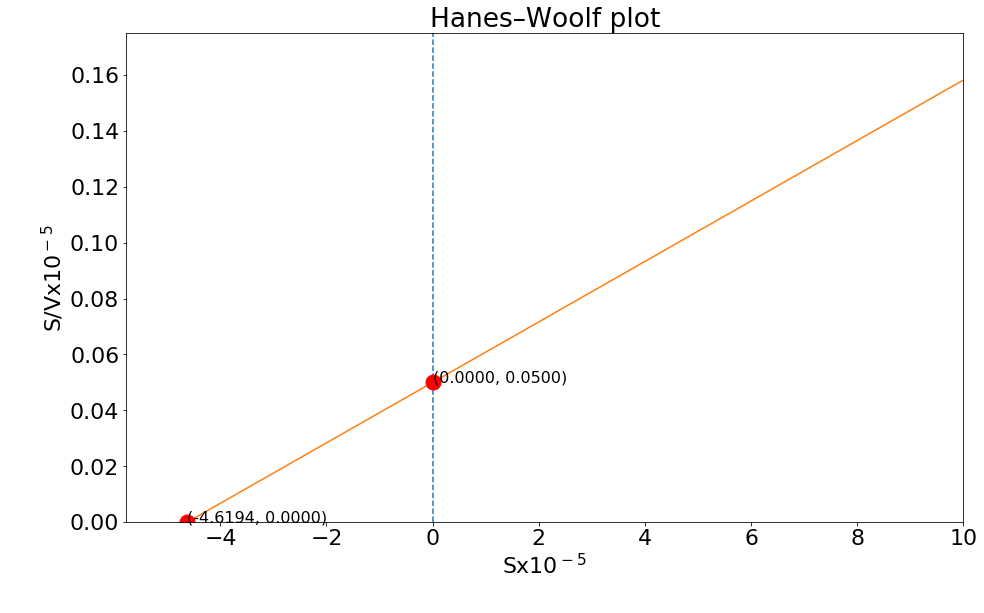

In [244]:
# Hanes–Woolf plot
hanes_slope, hanes_y_intercept = slope_intercept(S, S_by_V)
hanes_vmax = 1/hanes_slope
hanes_km = hanes_vmax*hanes_y_intercept
hanes_x_intercept = -1*hanes_km
# trend line parameters
hanes_trend_line = [[hanes_x_intercept, 0], [0, hanes_y_intercept], [2*max(S), hanes_slope*(2*max(S))+hanes_y_intercept]] 
hanes_trend_x = [x for [x, y] in hanes_trend_line]
hanes_trend_y = [y for [x, y] in hanes_trend_line]

plt.figure(figsize = (15, 9))
plt.axis([1.25*hanes_x_intercept, 1.25*max(S), 0, 1.25*max(S_by_V)])
plt.title("Hanes–Woolf plot")
plt.plot(x_line, y_line, '--')
plt.plot(hanes_trend_x, hanes_trend_y)
plt.plot(hanes_trend_x, hanes_trend_y, 'o', color = 'r', markersize = 15)
for xy in zip(hanes_trend_x, hanes_trend_y):
    plt.annotate('(%.4f, %.4f)' % xy, xy=xy, textcoords='data', size = 16)
plt.xlabel(superscript("S", 10, S_multiple))
plt.ylabel(superscript("S/V", 10, S_by_V_multiple))
print("Slope : ", hanes_slope)
print("Y Intercept : ", hanes_y_intercept)
print("X Intercept : ", hanes_x_intercept)
print("Vmax : ",burk_vmax)
print("Km : ", burk_km)